In [1]:
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # 解决中文乱码问题（mac系统）

In [2]:
# 文件路径
filePath = sys.path[0]

# 导入数据
df_train1 = pd.read_csv(filePath + os.sep + 'datasets' + os.sep + 'train_format1.csv', encoding='ISO-8859-1')
df_train2 = pd.read_csv(filePath + os.sep + 'datasets' + os.sep + 'train_format2.csv', encoding='ISO-8859-1')
df_test1 = pd.read_csv(filePath + os.sep + 'datasets' + os.sep + 'test_format1.csv', encoding='ISO-8859-1')
df_test2 = pd.read_csv(filePath + os.sep + 'datasets' + os.sep + 'test_format2.csv', encoding='ISO-8859-1')
df_user_info = pd.read_csv(filePath + os.sep + 'datasets' + os.sep + 'user_info_format1.csv', encoding='ISO-8859-1')
df_user_log = pd.read_csv(filePath + os.sep + 'datasets' + os.sep + 'user_log_format1.csv', encoding='ISO-8859-1')

In [3]:
# 查看数据规模
# print('----------数据集规模-------------')
print('df_train1 shape: ', df_train1.shape, df_train1.columns)
print('df_train2 shape: ', df_train2.shape, df_train2.columns)
print('df_test1 shape: ', df_test1.shape, df_test1.columns)
print('df_test2 shape: ', df_test2.shape, df_test2.columns)
# print('df_user_info shape: ', df_user_info.shape, df_user_info.columns)
# print('df_user_log shape: ', df_user_log.shape, df_user_log.columns)

# 查看数据大体情况
# print('-----------数据集字段-------------')
# print('df_train1 head: \n', df_train1.head())
# print('df_train2 head: \n', df_train2.head())
# print('df_test1 head: \n', df_test1.head())
# print('df_test2 head: \n', df_test2.head())
# print('df_user_info head: \n', df_user_info.head())
# print('df_user_log head: \n', df_user_log.head())

# 查看是否有缺失值
# print(df_train1.info(verbose=True,null_counts=True))
# print(df_train2.info(verbose=True,null_counts=True))
# print(df_test1.info(verbose=True,null_counts=True))
# print(df_test2.info(verbose=True,null_counts=True))
# print(df_user_info.info(verbose=True,null_counts=True))
# print(df_user_log.info(verbose=True,null_counts=True))

df_train1 shape:  (260864, 3) Index(['user_id', 'merchant_id', 'label'], dtype='object')
df_train2 shape:  (7030723, 6) Index(['user_id', 'age_range', 'gender', 'merchant_id', 'label',
       'activity_log'],
      dtype='object')
df_test1 shape:  (261477, 3) Index(['user_id', 'merchant_id', 'prob'], dtype='object')
df_test2 shape:  (7027943, 6) Index(['user_id', 'age_range', 'gender', 'merchant_id', 'label',
       'activity_log'],
      dtype='object')


In [4]:
# 异常值处理
df_user_info['age_range'].replace(0.0,np.nan,inplace=True)
df_user_info['gender'].replace(2.0,np.nan,inplace=True)
df_user_info['age_range'].replace(np.nan,-1,inplace=True)
df_user_info['gender'].replace(np.nan,-1,inplace=True)
print(df_user_info.info(verbose=True,null_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
user_id      424170 non-null int64
age_range    424170 non-null float64
gender       424170 non-null float64
dtypes: float64(2), int64(1)
memory usage: 9.7 MB
None


Text(0.5, 1.0, '用户年龄分布')

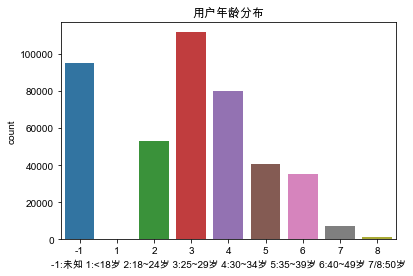

In [5]:
# -1表示未知；<18岁为1；[18,24]为2； [25,29]为3； [30,34]为4；[35,39]为5；[40,49]为6； >= 50时为7和8
ax_age = sns.countplot(x = 'age_range', order = [-1,1,2,3,4,5,6,7,8], data = df_user_info)
# target_names = {'-1': 'NULL', '1': '', }
# ax_age = set_yticklabels(target_names)
plt.xlabel('-1:未知 1:<18岁 2:18~24岁 3:25~29岁 4:30~34岁 5:35~39岁 6:40~49岁 7/8:50岁')
plt.title('用户年龄分布')


Text(0.5, 1.0, '用户性别分布')

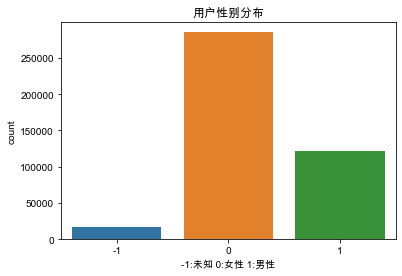

In [8]:
# 用户性别。0表示女性，1表示男性，-1表示未知
ax_gender = sns.countplot(x='gender',order = [-1,0,1], data = df_user_info)
# plt.xlabel = ('-1:未知 0:女性 1:男性')
ax_gender.set_xlabel('-1:未知 0:女性 1:男性')
plt.title('用户性别分布')

Text(0.5, 1.0, '用户性别年龄分布')

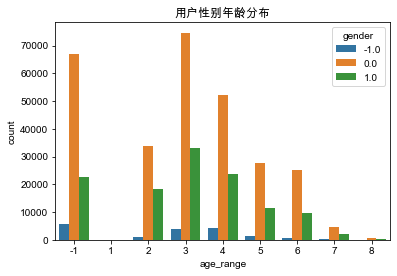

In [8]:
sns.countplot(x = 'age_range', order = [-1,1,2,3,4,5,6,7,8],hue= 'gender',data = df_user_info)
plt.title('用户性别年龄分布')

In [10]:
df_user_log.isnull().sum(axis=0)  # 查看缺失值
df_user_log = df_user_log.dropna()  # 删除具有缺失值的列
print(df_user_log.info(verbose=True,null_counts=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54834315 entries, 0 to 54925329
Data columns (total 7 columns):
user_id        54834315 non-null int64
item_id        54834315 non-null int64
cat_id         54834315 non-null int64
seller_id      54834315 non-null int64
brand_id       54834315 non-null float64
time_stamp     54834315 non-null int64
action_type    54834315 non-null int64
dtypes: float64(1), int64(6)
memory usage: 3.3 GB
None


Text(0, 0.5, '购买行为数量')

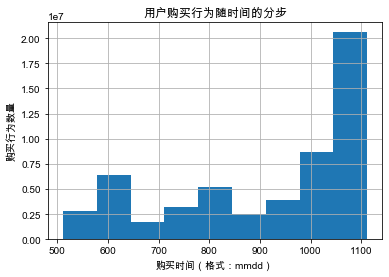

In [5]:
# 用户购买行为数量随时间的分布
action_time = df_user_log['time_stamp']
action_time.hist(bins = 9)
plt.title('用户购买行为随时间的分步')
plt.xlabel('购买时间（格式：mmdd）')
plt.ylabel('购买行为数量')
# df_user_log['time_stamp']

Text(0.5, 1.0, '用户行为数据')

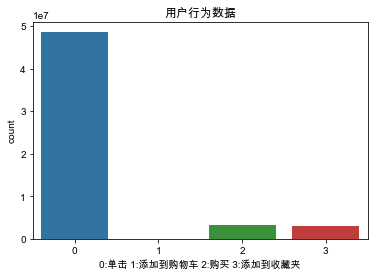

In [13]:
# 观察用户购买相关的行为
# 包含{0, 1, 2, 3}，0表示单击，1表示添加到购物车，2表示购买，3表示添加到收藏夹
ax_action_type = sns.countplot(x = 'action_type', order = [0,1,2,3],data = df_user_log)
ax_action_type.set_xlabel('0:单击 1:添加到购物车 2:购买 3:添加到收藏夹')
ax_action_type.set_title('用户行为数据')